<a href="https://colab.research.google.com/github/karan-saklani/MachineLearning/blob/master/Stock_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#
# import libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
#
# import data
# 
data = pd.read_csv('/content/drive/MyDrive/stock.csv')

In [4]:
data

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
# check for null values
data.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [6]:
# detailed information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [7]:
# find mean,max,min,std of all stocks
data.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [8]:
# find mean,std deviation and max and min values of the stock over time line by line
for i in range(1,data.values.shape[1]):
  print('\033[95m',data.columns[i],'\033[0m')
  print('\033[1m'+'Mean Return'+'\033[0m'+'\033[91m',data.iloc[:,i].mean(),'\033[0m')
  print('\033[1m'+'Standard Deviation'+'\033[0m'+'\033[91m',data.iloc[:,i].std(),'\033[0m')
  print('\033[1m'+'Max Return'+'\033[0m'+'\033[91m',data.iloc[:,i].max(),'\033[0m')
  print('\033[1m'+'Min Return'+'\033[0m'+'\033[91m',data.iloc[:,i].min(),'\033[0m')

 AAPL 
Mean Return 140.81982259008825 
Standard Deviation 70.82760132839698 
Max Return 455.609985 
Min Return 55.790001 
 BA 
Mean Return 189.9427002862435 
Standard Deviation 103.67858597481985 
Max Return 440.619995 
Min Return 67.239998 
 T 
Mean Return 35.162899482630756 
Standard Deviation 3.2074898522656103 
Max Return 43.470001 
Min Return 26.77 
 MGM 
Mean Return 23.105743391848073 
Standard Deviation 6.963847046140433 
Max Return 38.029999 
Min Return 7.14 
 AMZN 
Mean Return 915.6656649203334 
Standard Deviation 697.838904933664 
Max Return 3225.0 
Min Return 175.929993 
 IBM 
Mean Return 161.85300148587336 
Standard Deviation 25.561937789518435 
Max Return 215.800003 
Min Return 94.769997 
 TSLA 
Mean Return 259.6008153186657 
Standard Deviation 210.98800293601454 
Max Return 1643.0 
Min Return 22.790001 
 GOOG 
Mean Return 783.7125121449732 
Standard Deviation 334.4480569440201 
Max Return 1568.48999 
Min Return 278.481171 
 sp500 
Mean Return 2218.7495540592877 
Standard 

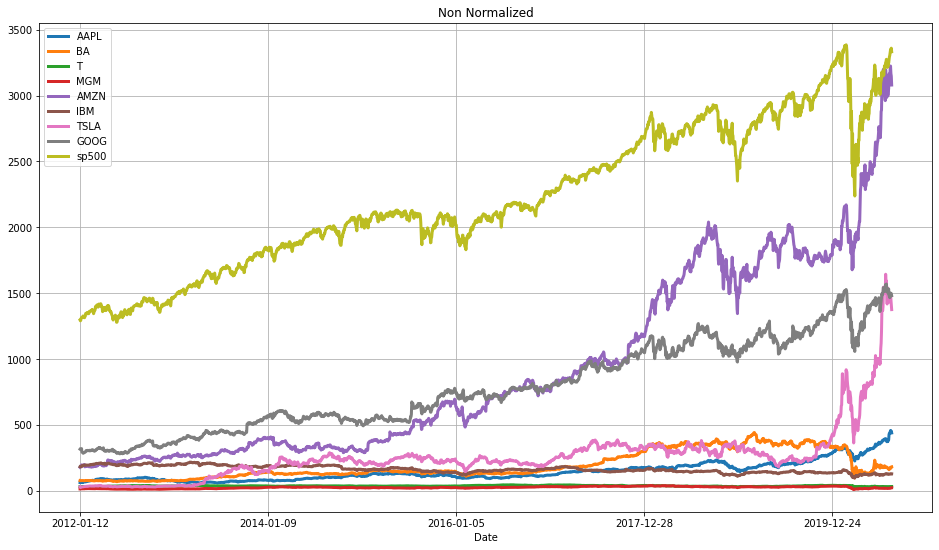

In [9]:
#  Non Normalized
data.plot(x = 'Date',linewidth = 3,figsize = (16,9),title = 'Non Normalized')
plt.grid()
plt.show()

In [10]:
# Scale prices
def scale(x,mx,mn):
  return (x-mn)/(mx-mn)
scale_data = data.copy()
for i in range(1,data.values.shape[1]):
  mx = data.iloc[:,i].max()
  mn = data.iloc[:,i].min()
  scale_data.iloc[:,i] = scale_data.iloc[:,i].map(lambda x:scale(x,mx,mn))


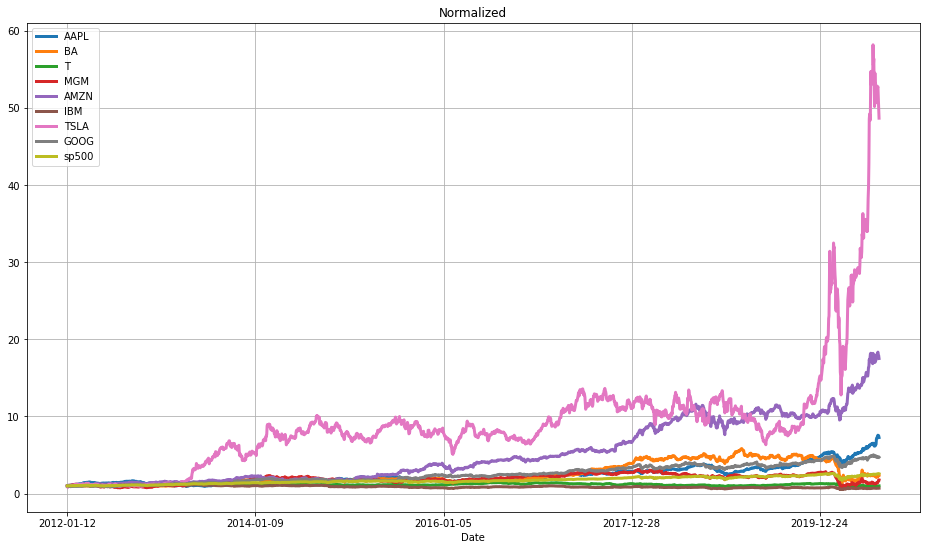

In [11]:
# Normalized data (Starts from the same starting value ,i.e. 0)
# This can be done to find the multiplication factor of the investment 
norm_data = data.copy()
for i in range(1,data.values.shape[1]):
  sc = data.iloc[0,i]
  norm_data.iloc[:,i] = norm_data.iloc[:,i].map(lambda x:x/sc)
norm_data.plot(x = 'Date',linewidth = 3,title = 'Normalized',figsize = (16,9))
plt.grid()
plt.show()

In [12]:
# Interactive plotting of Stock Prices
def interactive_plot(data,title):
  fig = px.line(title = title)
  for i in data.columns[1:]:
    fig.add_scatter(x = data['Date'],y = data[i],name = i)
  fig.show()
interactive_plot(data,'Stock Prices')

In [13]:
# Interactive plotting of Normalized data
def normalize(data,start,end):
  df = data.copy()
  for i in range(start,end):
    sc = df[df.columns[i]][0]
    df[df.columns[i]] = df[df.columns[i]].map(lambda x:x/sc)
  return df

In [14]:
interactive_plot(normalize(data,1,data.shape[1]),'Normalized')

In [15]:
# Considering Pandemic Drop, in March
# 100 S&P shares bought on 19th Feb
# Money lost till 23rd March
# Date formate yyyy-mm-dd
def convert_format(date):
  dl = date.split('/')
  date = '-'
  date = date.join(dl[::-1])
  return date

def turnout(data,stock,start_date,end_date,N,size = (16,9)):
  start_date = convert_format(start_date)
  end_date = convert_format(end_date)
  dt = data.set_index('Date')[start_date:end_date]
  dt[stock].plot(linewidth = 3,title = stock+' from '+start_date+' to '+end_date,figsize = size)
  plt.grid()
  plt.show()
  price = N*(dt[stock].iloc[0] - dt[stock].iloc[-1])
  return -price

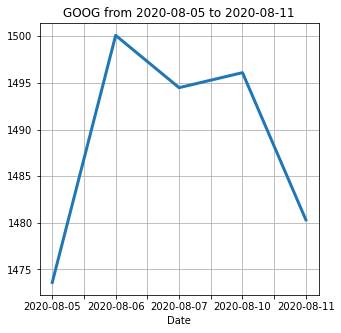

670.9961000000021

In [16]:
turnout(data,'GOOG','05/08/2020','11/08/2020',100,(5,5))

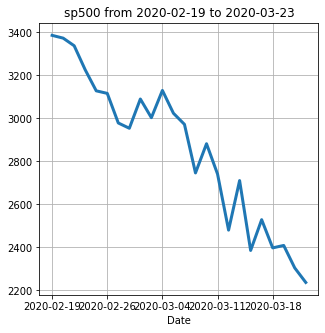

-114875.0

In [17]:
turnout(data,'sp500','19/02/2020','23/03/2020',100,(5,5))

In [18]:
# daily return: simply the percentage change in the price
def convert_format(date):
  dl = date.split('/')
  date = '-'
  date = date.join(dl[::-1])
  return date
def daily_return(data,stock,start_date = data['Date'].iloc[0],end_date = data['Date'].iloc[-1]):
  start_date = convert_format(start_date)
  end_date = convert_format(end_date)
  df = data.set_index('Date')[start_date:end_date][stock]
  ret = df.copy()
  ret[0] = 0
  for i in range(1,len(df)):
    ret[i] = 100*(df[i] - df[i-1])/df[i-1]
  return ret

In [19]:
# daily return for S&P 500
daily_return(data,'sp500')

Date
2012-01-12    0.000000
2012-01-13   -0.494792
2012-01-17    0.355295
2012-01-18    1.110793
2012-01-19    0.493866
                ...   
2020-08-05    0.642974
2020-08-06    0.642770
2020-08-07    0.063303
2020-08-10    0.274222
2020-08-11   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [20]:
# daily return for entire DataFrame
def all_return(data):
  df_dailyreturn = data.copy()
  for i in data.columns[1:]:
    df_dailyreturn[i][0] = 0 
    for j in range(1,len(data)):
      df_dailyreturn[i][j] = 100*(data[i][j] - data[i][j-1])/data[i][j-1]
  return df_dailyreturn
df_dailyreturn = all_return(data)

In [21]:
def interactive_plot(data):
  fig = px.line(title = 'Daily Returns')
  for i in data.columns[1:]:
    fig.add_scatter(x = data['Date'],y = data[i],name = i)
  fig.show()
interactive_plot(df_dailyreturn)

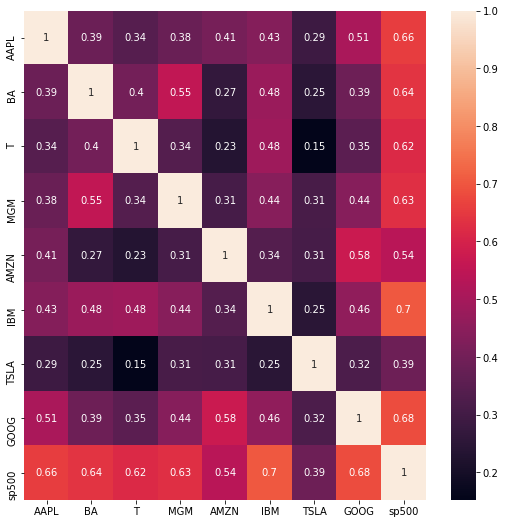

In [22]:
# plot correlation between stocks
cr = df_dailyreturn.corr()
plt.figure(figsize = (9,9))
sns.heatmap(cr,annot = True)
plt.show()

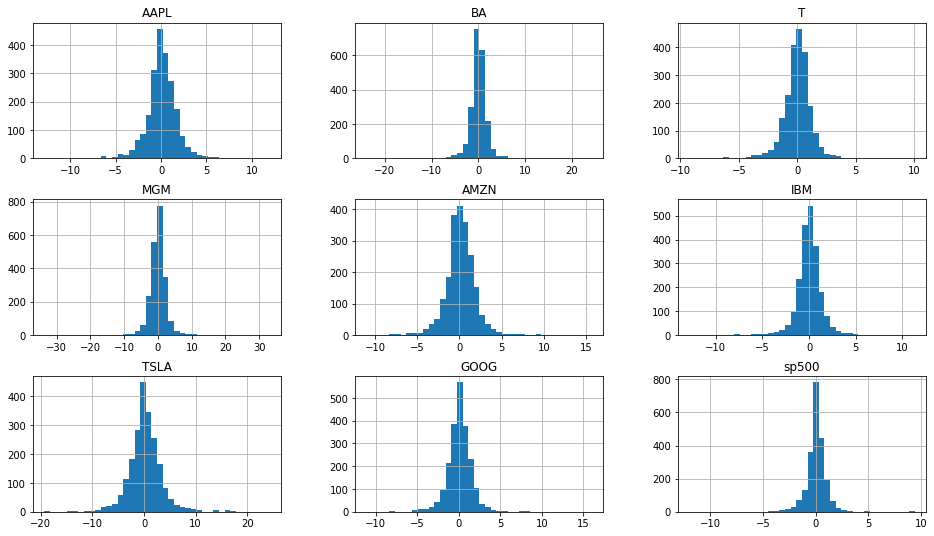

In [25]:
# Risk taking
# Plot histogram of return values
df_dailyreturn.hist(figsize = (16,9),bins = 40);

In [33]:
# Interactive Histogram plots
df = []

for i in df_dailyreturn.columns[1:]:
  df.append(df_dailyreturn[i].values)

# Use figure factory for plotting
fig = ff.create_distplot(df,data.columns[1:])
fig.show()

In [34]:
# Tesla/MGM is found to be more risky as we can see the data is more spread out